In [77]:
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt

In [3]:
caminho_2019 = "../dados/obitos-2019.csv"
caminho_2020 = "../dados/obitos-2020.csv"

In [4]:
dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)

In [8]:
print(dados_2019.shape, dados_2020.shape)

(12390, 6) (14965, 6)


In [9]:
dados_2019.sample(3)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
6178,MG,INDETERMINADA,OUTROS_SERVICOS_SAUDE,60 - 69,M,19
493,PA,INSUFICIENCIA_RESPIRATORIA,DOMICILIO,< 9,I,1
9950,ES,SEPTICEMIA,OUTROS_SERVICOS_SAUDE,90 - 99,F,8


In [11]:
dados_2019['uf'].unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [12]:
dados_2020['tipo_doenca'].unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [13]:
dados_2020['tipo_doenca'].value_counts()

OUTRAS                        3807
INSUFICIENCIA_RESPIRATORIA    2344
PNEUMONIA                     2218
COVID                         2117
SEPTICEMIA                    2037
INDETERMINADA                 1352
SRAG                          1090
Name: tipo_doenca, dtype: int64

In [14]:
#veja que no arq original ,cada linha tem uma coluna "quantidade" , é preciso somar por groupby!

In [16]:
obitos_2019 = dados_2019.groupby("tipo_doenca").sum()
#unica coluna com numeros é a que queremos, entao ele vai somar a certa. outra opcao seria montar uma query
obitos_2019

,total
tipo_doenca,
COVID,1
INDETERMINADA,6993
INSUFICIENCIA_RESPIRATORIA,100747
OUTRAS,661710
PNEUMONIA,226469
SEPTICEMIA,175643
SRAG,1498


In [18]:
dados_2020.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14965 entries, 0 to 14964
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uf            14965 non-null  object
 1   tipo_doenca   14965 non-null  object
 2   local_obito   14965 non-null  object
 3   faixa_etaria  14965 non-null  object
 4   sexo          14964 non-null  object
 5   total         14965 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 701.6+ KB


In [20]:
obitos_2020 = dados_2020.groupby("tipo_doenca").sum()
obitos_2020

,total
tipo_doenca,
COVID,196321
INDETERMINADA,9748
INSUFICIENCIA_RESPIRATORIA,99331
OUTRAS,693191
PNEUMONIA,182501
SEPTICEMIA,163309
SRAG,16612


In [66]:
obitos_2020.loc['COVID']

total    196321
Name: COVID, dtype: int64

In [67]:
int(obitos_2020.loc['COVID'])

196321

In [73]:
obitos_2020.query('tipo_doenca == "COVID"')

,total
tipo_doenca,
COVID,196321


In [21]:
proporcao = obitos_2020/obitos_2019
proporcao

,total
tipo_doenca,
COVID,196321.000000
INDETERMINADA,1.393965
INSUFICIENCIA_RESPIRATORIA,0.985945
OUTRAS,1.047575
PNEUMONIA,0.805854
SEPTICEMIA,0.929778
SRAG,11.089453


In [22]:
#sera q tem diferença entre estados? precisa da populacao . idades? 
obitos_2020.sample(4)

,total
tipo_doenca,
COVID,196321
SEPTICEMIA,163309
INSUFICIENCIA_RESPIRATORIA,99331
OUTRAS,693191


In [39]:
faixa_etaria = dados_2020.groupby("faixa_etaria").sum() 
total = faixa_etaria['total'].sum()
faixa_etaria['total_normalizado'] = (faixa_etaria['total'] / total) * 100

In [40]:
faixa_etaria

,total,total_normalizado
faixa_etaria,,
10 - 19,7428,0.545770
20 - 29,24408,1.793370
30 - 39,40595,2.982705
40 - 49,78443,5.763575
50 - 59,146482,10.762719
60 - 69,244990,18.000563
70 - 79,300294,22.064007
80 - 89,295127,21.684363
90 - 99,149468,10.982114


In [53]:
sexo = dados_2020.groupby("sexo").sum()
total = sexo['total'].sum()
sexo['total_normalizado'] = (sexo['total'] / total) * 100

In [54]:
sexo

,total,total_normalizado
sexo,,
F,619321,45.504448
I,5069,0.372443
M,736622,54.123108


In [ ]:
por_uf #numeros estao errados.tem q ser divididos pela populacao, nao entre eles. 
#ex: 54% das mortes sao homens, mas se 54% da populacao total é homem, a estatistica 
# correta seria que homens e mulheres morrem na mesma proporcao.
# mesma coisa para dividir por faixa etaria. 

In [91]:
#2a parte da aula
def grafico_comparativo(causa):
    total_2019 = dados_2019.groupby('tipo_doenca').sum()
    total_2020 = dados_2020.groupby('tipo_doenca').sum()

    #quero só a linha 'x' para comparar 2019 com 2020
    lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa]),]

    dados = pd.DataFrame({'total': lista,
                            'ano': [2019, 2020]})

    plt.figure(figsize=(8,6))
    sns.barplot(x = 'ano', y= 'total', data=dados)
    plt.title(f'Óbitos por {causa}')
    plt.show()


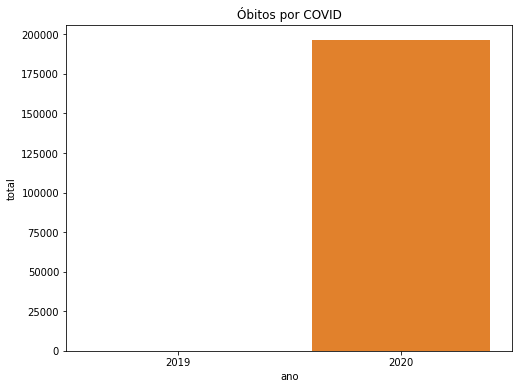

In [92]:
grafico_comparativo("COVID")